<a href="https://colab.research.google.com/github/brmontgomery/483-Intro_To_ML_Assignments/blob/main/Project%204%20-%20Classifier%20Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 4 - Classifier Algorithms.
**Group members:** Zach Hofmeister, Brian Montgomery, and Karla Cabrera.

**Section:** CS 483-02

**Semester:** Fall 2021


**Project Summary:** In this project we worked with some toy datasets to compare the decision boundaries determined by several classifier algorithms.


#Experiment 1
Load and examine each dataset.

In [ ]:
import pandas as pd
#read csv usinf pandas read_csv
header_list = ['Column1', 'Column2','y']
dataSet1 = pd.read_csv('dataset1.csv', header=None, names=header_list)
dataSet2 = pd.read_csv('dataset2.csv', header=None, names=header_list)
dataSet3 = pd.read_csv('dataset3.csv', header=None, names=header_list)

#used pandas.DataFrame.head to examine first 3 rows
print(f"Dataset 1: \n{dataSet1.head(3)}")
print(f"Dataset 2: \n{dataSet2.head(3)}")
print(f"Dataset 3: \n{dataSet3.head(3)}")

Dataset 1: 
     Column1    Column2  y
0   1.800539  -0.539218  0
1  24.330831  26.439146  1
2  21.124114  21.166814  1
Dataset 2: 
     Column1    Column2  y
0  -1.664407  17.245415  0
1  20.211237   8.599145  1
2  12.675218  23.148375  1
Dataset 3: 
     Column1    Column2  y
0  30.876149   7.806793  0
1  34.060953  14.802478  0
2  30.860440  16.270849  0


##Results
 Each of the datasets is loaded in without headers. Due to this, DataFrame.head(int n) outputs a zero in the headers line in addition to the intended columns.

---

#Experiment 2
Fit and score binary classifiers for dataset 1 using logistic regression, Gaussian naive Bayes, and K-Nearest Neighbors for dataset 1. How accurate are the model’s predictions?

**Note:** Since these are toy datasets, and we are interested in the behavior of the classifiers themselves rather than making predictions, do not split the data into training and test sets. Train with the entire dataset.

In [ ]:
import numpy as np

dataSet1_vanilla = dataSet1.copy()
#set aside y value
target1 = dataSet1['y']
#drop y column
dataSet1.drop(columns=['y'], inplace = True)

#function for Logistic Regresion
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logReg = LogisticRegression()
logReg.fit(dataSet1, target1)
print(f"dataSet1 Logistic Regression: {logReg.score(dataSet1, target1)}")

#function for testing the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(dataSet1, target1)
#predict using the training and test sets
print(f"score with Gaussian Naive Bayes: {clf.score(dataSet1, target1)}")

#function for KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(dataSet1, target1)
#predict using the training and test sets
print(f"score with KNN: {neigh.score(dataSet1, target1)}")



dataSet1 Logistic Regression: 1.0
score with Gaussian Naive Bayes: 1.0
score with KNN: 1.0


## Results
 The predictions for dataset 1 are all very accurate, and interestingly all 3 prediction methods give the exact same score.

---

#Experiment 3
Repeat experiment (2) for dataset 2. How do your results compare?

In [ ]:
dataSet2_vanilla = dataSet2.copy()
#set aside y value
target2 = dataSet2['y']
#drop y column
dataSet2.drop(columns=['y'], inplace = True)

logReg = LogisticRegression()
logReg.fit(dataSet2, target2)
print(f"dataSet1 Logistic Regression: {logReg.score(dataSet2, target2)}")

#function for testing the Naive Bayes model
clf = GaussianNB()
clf.fit(dataSet2, target2)
#predict using the training and test sets
print(f"score with Gaussian Naive Bayes: {clf.score(dataSet2, target2)}")

#function for KNN
neigh = KNeighborsClassifier()
neigh.fit(dataSet2, target2)
#predict using the training and test sets
print(f"score with KNN: {neigh.score(dataSet2, target2)}")



dataSet1 Logistic Regression: 0.525
score with Gaussian Naive Bayes: 1.0
score with KNN: 1.0


## Results
 Our results for dataset 2 are not as accurate as they were for dataset 1, but are still very high. Naive bayes scored the highest, and KNN scored the lowest.

---

#Experiment 4
Create scatterplots for datasets 1 and 2, plotting points from class 0 with a different color and marker from points in class 1. What accounts for the discrepancies between experiments (2) and (3)?

"fig = plt.figure()\nax = plt.axes(projection='3d')\nxData1 = dataSet1_vanilla['Column1']\nyData1 = dataSet1_vanilla['Column2']\nzData1 = dataSet1_vanilla['y']\nax.scatter3D(xData1, yData1, zData1);\n\nxData2 = dataSet2_vanilla['Column1']\nyData2 = dataSet2_vanilla['Column2']\nzData2 = dataSet2_vanilla['y']\nax.scatter3D(xData2, yData2);"

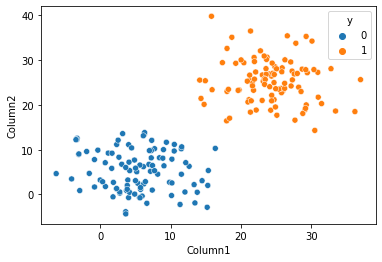

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="Column1", y="Column2", hue='y', data=dataSet1_vanilla)

'''fig = plt.figure()
ax = plt.axes(projection='3d')
xData1 = dataSet1_vanilla['Column1']
yData1 = dataSet1_vanilla['Column2']
zData1 = dataSet1_vanilla['y']
ax.scatter3D(xData1, yData1, zData1);

xData2 = dataSet2_vanilla['Column1']
yData2 = dataSet2_vanilla['Column2']
zData2 = dataSet2_vanilla['y']
ax.scatter3D(xData2, yData2);'''

<AxesSubplot:xlabel='Column1', ylabel='Column2'>

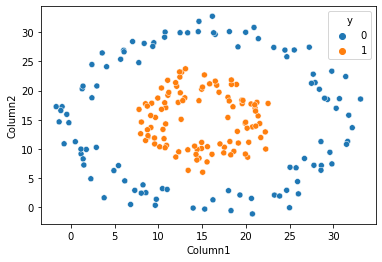

In [ ]:
sns.scatterplot(x="Column1", y="Column2", hue='y', data=dataSet2_vanilla)

## Results
 Dataset 1 is plotted in blue, and dataset 2 is in orange. Dataset 1 appears to have two random clumps of values, with very different values for column 1 and 2 determining what class they will be in. Dataset 2 appears to have 2 rings of values, with the inner and outer rings mapping to a different class. The greater variance between the column values in dataset 1 seems to result in the prediction score being higher than that of dataset 2.

---

#Experiment 5
Repeat experiments (3) and (4) for dataset 3. What do you observe about the differences in behavior between the classifiers?

dataSet1 Logistic Regression: 0.87
score with Gaussian Naive Bayes: 0.885
score with KNN: 1.0


<AxesSubplot:xlabel='Column1', ylabel='Column2'>

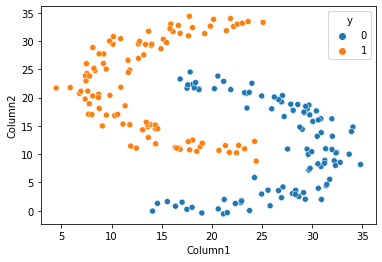

In [ ]:
dataSet3_vanilla = dataSet3.copy()
#set aside y value
target3 = dataSet3['y']
#drop y column
dataSet3.drop(columns=['y'], inplace = True)

logReg = LogisticRegression()
logReg.fit(dataSet3, target3)
print(f"dataSet1 Logistic Regression: {logReg.score(dataSet3, target3)}")

#function for testing the Naive Bayes model
clf = GaussianNB()
clf.fit(dataSet3, target3)
#predict using the training and test sets
print(f"score with Gaussian Naive Bayes: {clf.score(dataSet3, target3)}")

#function for KNN
neigh = KNeighborsClassifier()
neigh.fit(dataSet3, target3)
#predict using the training and test sets
print(f"score with KNN: {neigh.score(dataSet3, target3)}")

sns.scatterplot(x="Column1", y="Column2", hue='y', data=dataSet3_vanilla)


## Results
 Blue: Dataset 1
 Orange: Dataset 2
 Green: Dataset 3

 In Dataset 3, it column 1 seems to affect the class much more than column 2, whereas in in Dataset 2 the class was dependent on the specific values of both columns. Also, KNN performed better on Dataset 3 than Naive Bayes, whereas NB performed better on Dataset 2 than KNN. It could be that KNN is better at making predictions for data that is heavily weighted on a few columns, and NB is better at making predictions that rely on more evenly weighted columns.

---

#Experiment 6
Use the code from KV Subbaiah Setty’s tutorial How To Plot A Decision Boundary For Machine Learning Algorithms in Python as a guide, plot the decision boundaries for each classifier and dataset. Does this help to explain the behavior you saw in experiment (5)?


Data Set 1
Logistic Regression plot


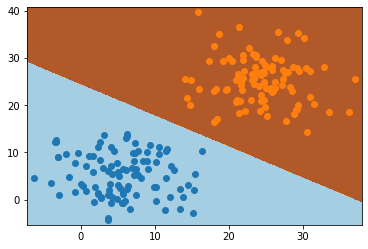

Gaussian Naive Bayes plot


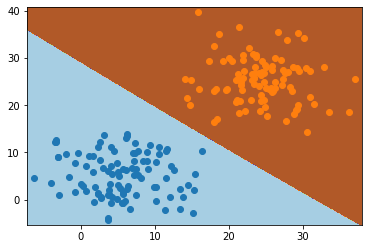

KNN plot


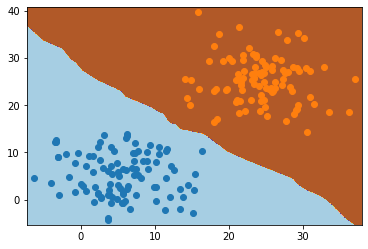


Data Set 2
Logistic Regression plot


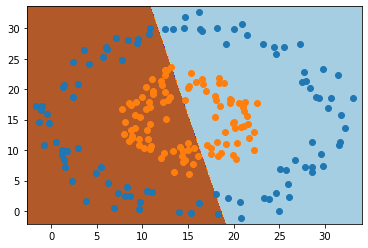

Gaussian Naive Bayes plot


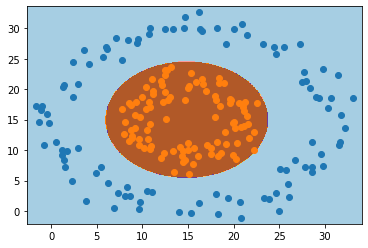

KNN plot


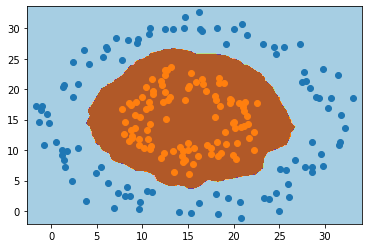


Data Set 3
Logistic Regression plot


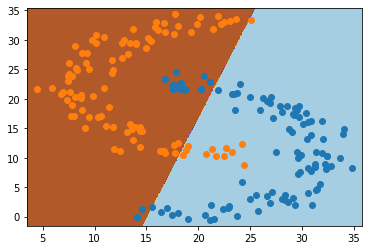

Gaussian Naive Bayes plot


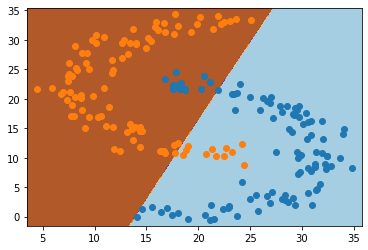

KNN plot


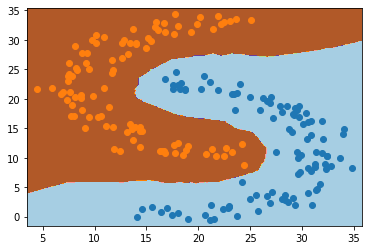

In [ ]:
import matplotlib.pyplot as plt

def contourGraph(dataSet, target):
  # define bounds of the domain
  min1, max1 = dataSet["Column1"].min()-1, dataSet["Column1"].max()+1
  min2, max2 = dataSet["Column2"].min()-1, dataSet["Column2"].max()+1

  # define the x and y scale
  x1grid = np.arange(min1, max1, 0.1)
  x2grid = np.arange(min2, max2, 0.1)

  # create all of the lines and rows of the grid
  xx, yy = np.meshgrid(x1grid, x2grid)

  # flatten each grid to a vector
  r1, r2 = xx.flatten(), yy.flatten()
  r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

  # horizontal stack vectors to create x1,x2 input for the model
  grid = np.hstack((r1,r2))

  #refit the models
  logReg.fit(dataSet.values, target)
  clf.fit(dataSet.values, target)
  neigh.fit(dataSet.values, target)

  # make predictions for the grid
  yhatLog = logReg.predict(grid)
  yhatClf = clf.predict(grid)
  yhatNeigh = neigh.predict(grid)
  # reshape the predictions back into a grid
  zzLog = yhatLog.reshape(xx.shape)
  zzClf = yhatClf.reshape(xx.shape)
  zzNeigh = yhatNeigh.reshape(xx.shape)

  # plot the grid of x, y and z values as a surface
  print("Logistic Regression plot")
  plt.contourf(xx, yy, zzLog, cmap='Paired')
  # create scatter plot for samples from each class
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

  print("Gaussian Naive Bayes plot")
  plt.contourf(xx, yy, zzClf, cmap='Paired')
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

  print("KNN plot")
  plt.contourf(xx, yy, zzNeigh, cmap='Paired')
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

#invoke the Contour Graphs
print("\nData Set 1")
contourGraph(dataSet1, target1)
print("\nData Set 2")
contourGraph(dataSet2, target2)
print("\nData Set 3")
contourGraph(dataSet3, target3)

##Results
 For dataset 1,  we can see there is a clear separation in classes when the decision boundary is applied. Also, applying a decision boundary allows us to visually see that KNN performed better on Dataset 3 than Naive Bayes, whereas NB performed better on Dataset 2 than KNN.

---

#Experiment 7
Repeat experiments (3), (4), and (6), this time using Support Vector Machines with linear, polynomial, radial basis function, and sigmoid kernels. Which kernels do the best and worst and finding appropriate decision boundaries?


Data Set 1
Linear SVC plot


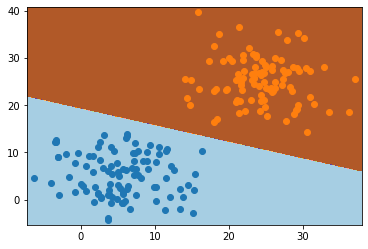

Polynomial SVC plot


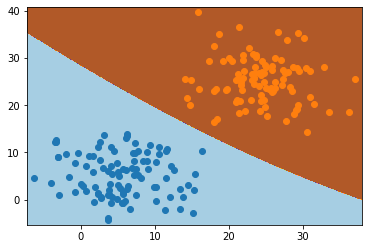

Radial Basis Function SVC plot


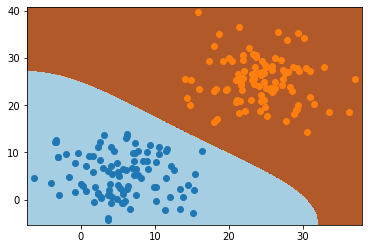

Sigmoid SVC plot


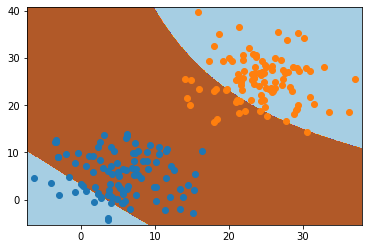


Data Set 2
Linear SVC plot


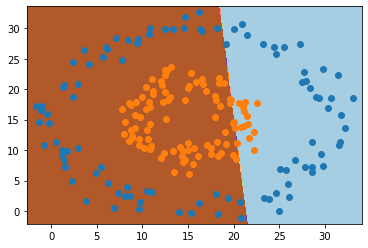

Polynomial SVC plot


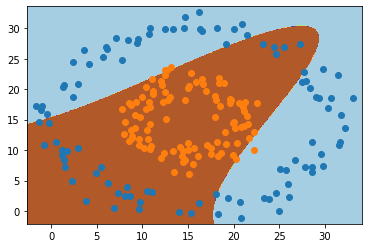

Radial Basis Function SVC plot


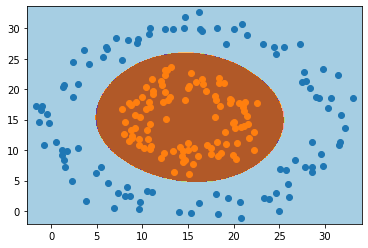

Sigmoid SVC plot


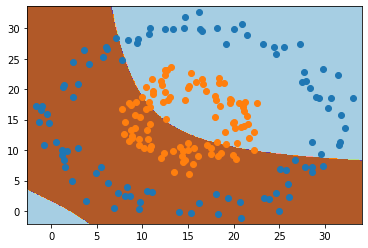


Data Set 3
Linear SVC plot


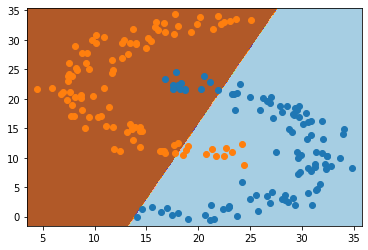

Polynomial SVC plot


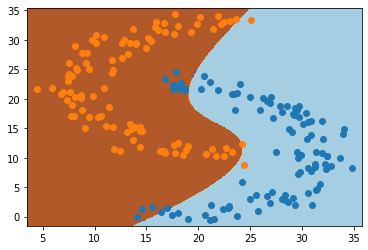

Radial Basis Function SVC plot


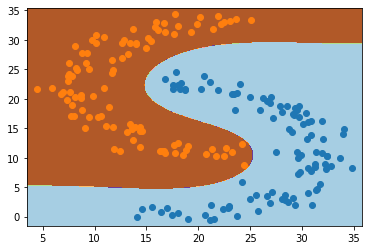

Sigmoid SVC plot


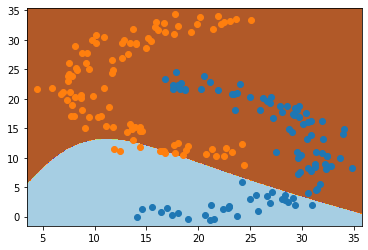

In [ ]:
from sklearn import svm

def contourGraphSVC(dataSet, target):
  # define bounds of the domain
  min1, max1 = dataSet["Column1"].min()-1, dataSet["Column1"].max()+1
  min2, max2 = dataSet["Column2"].min()-1, dataSet["Column2"].max()+1

  # define the x and y scale
  x1grid = np.arange(min1, max1, 0.1)
  x2grid = np.arange(min2, max2, 0.1)

  # create all of the lines and rows of the grid
  xx, yy = np.meshgrid(x1grid, x2grid)

  # flatten each grid to a vector
  r1, r2 = xx.flatten(), yy.flatten()
  r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

  # horizontal stack vectors to create x1,x2 input for the model
  grid = np.hstack((r1,r2))

  #make models
  svcLin = svm.SVC(kernel='linear')
  svcPoly = svm.SVC(kernel='poly')
  svcRbf = svm.SVC(kernel='rbf')
  svcSig = svm.SVC(kernel='sigmoid')

  #fit models
  svcLin.fit(dataSet.values, target)
  svcPoly.fit(dataSet.values, target)
  svcRbf.fit(dataSet.values, target)
  svcSig.fit(dataSet.values, target)

  # make predictions for the grid
  yhatLin = svcLin.predict(grid)
  yhatPoly = svcPoly.predict(grid)
  yhatRbf = svcRbf.predict(grid)
  yhatSig = svcSig.predict(grid)

  # reshape the predictions back into a grid
  zzLin = yhatLin.reshape(xx.shape)
  zzPoly = yhatPoly.reshape(xx.shape)
  zzRbf = yhatRbf.reshape(xx.shape)
  zzSig = yhatSig.reshape(xx.shape)

  # plot the grid of x, y and z values as a surface
  print("Linear SVC plot")
  plt.contourf(xx, yy, zzLin, cmap='Paired')
  # create scatter plot for samples from each class
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

  print("Polynomial SVC plot")
  plt.contourf(xx, yy, zzPoly, cmap='Paired')
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

  print("Radial Basis Function SVC plot")
  plt.contourf(xx, yy, zzRbf, cmap='Paired')
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

  print("Sigmoid SVC plot")
  plt.contourf(xx, yy, zzSig, cmap='Paired')
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

#invoke the Contour Graphs
print("\nData Set 1")
contourGraphSVC(dataSet1, target1)
print("\nData Set 2")
contourGraphSVC(dataSet2, target2)
print("\nData Set 3")
contourGraphSVC(dataSet3, target3)

##Results
 In dataset 1 the linear and polynomial kernels did the best at finding decision boundaries and the sigmoid kernel did the worst.

 In dataset 2 the Radial Basis Function kernel did the best at finding decision boundaries and the others all did horribly.

 In dataset 3 the Radial Basis Function kernel did the best at finding decision boundaries and the sigmoid and linear kernels did the worst.

---

#Experiment 8
Since dataset 3 seems the hardest to fit, let’s focus on that. If you look closely at the documentation, you’ll see that the polynomial kernel uses a default degree of 3, but it seems as if it ought to be possible to fit this dataset better.

Use sklearn.model_selection.GridSearchCV to try polynomial kernels of degree up to 10. Which leads to the best performance?


Data Set 3
Grid Search CV (Polynomial Degree 4) plot


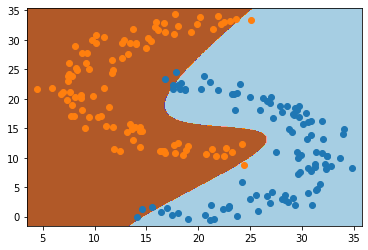

Grid Search CV (Polynomial Degree 5) plot


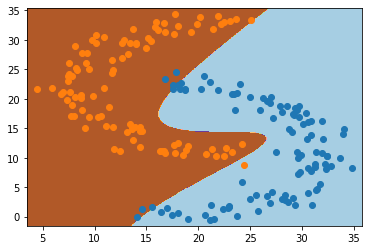

Grid Search CV (Polynomial Degree 6) plot


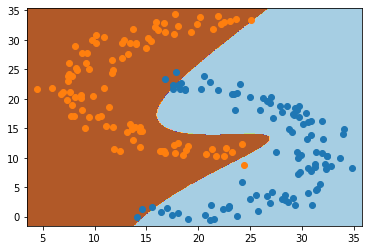

Grid Search CV (Polynomial Degree 7) plot


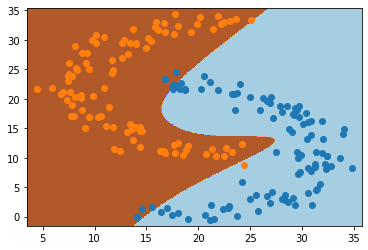

Grid Search CV (Polynomial Degree 8) plot


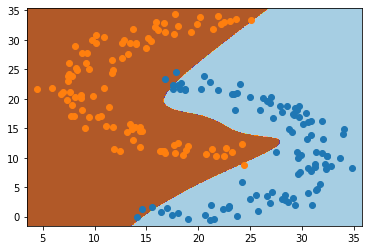

Grid Search CV (Polynomial Degree 9) plot


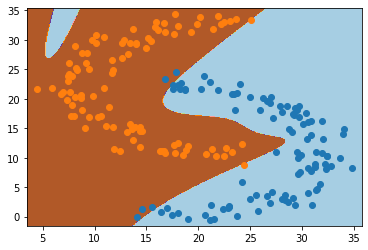

Grid Search CV (Polynomial Degree 10) plot


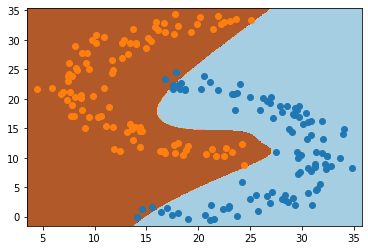

In [ ]:
from sklearn.model_selection import GridSearchCV

def contourGraphGridSearchCV(dataSet, target):
  # define bounds of the domain
  min1, max1 = dataSet["Column1"].min()-1, dataSet["Column1"].max()+1
  min2, max2 = dataSet["Column2"].min()-1, dataSet["Column2"].max()+1

  # define the x and y scale
  x1grid = np.arange(min1, max1, 0.1)
  x2grid = np.arange(min2, max2, 0.1)

  # create all of the lines and rows of the grid
  xx, yy = np.meshgrid(x1grid, x2grid)

  # flatten each grid to a vector
  r1, r2 = xx.flatten(), yy.flatten()
  r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

  # horizontal stack vectors to create x1,x2 input for the model
  grid = np.hstack((r1,r2))

  #create the models
  parameters4 = {'kernel':['poly'], 'degree': [4] }
  parameters5 = {'kernel':['poly'], 'degree': [5] }
  parameters6 = {'kernel':['poly'], 'degree': [6] }
  parameters7 = {'kernel':['poly'], 'degree': [7] }
  parameters8 = {'kernel':['poly'], 'degree': [8] }
  parameters9 = {'kernel':['poly'], 'degree': [9] }
  parameters10 = {'kernel':['poly'], 'degree': [10]}
  svc = svm.SVC()
  GSCV4 = GridSearchCV(svc, parameters4)
  GSCV5 = GridSearchCV(svc, parameters5)
  GSCV6 = GridSearchCV(svc, parameters6)
  GSCV7 = GridSearchCV(svc, parameters7)
  GSCV8 = GridSearchCV(svc, parameters8)
  GSCV9 = GridSearchCV(svc, parameters9)
  GSCV10 = GridSearchCV(svc, parameters10)

  #refit the models
  GSCV4.fit(dataSet.values, target)
  GSCV5.fit(dataSet.values, target)
  GSCV6.fit(dataSet.values, target)
  GSCV7.fit(dataSet.values, target)
  GSCV8.fit(dataSet.values, target)
  GSCV9.fit(dataSet.values, target)
  GSCV10.fit(dataSet.values, target)

  # make predictions for the grid
  yhatGSCV4 = GSCV4.predict(grid)
  yhatGSCV5 = GSCV5.predict(grid)
  yhatGSCV6 = GSCV6.predict(grid)
  yhatGSCV7 = GSCV7.predict(grid)
  yhatGSCV8 = GSCV8.predict(grid)
  yhatGSCV9 = GSCV9.predict(grid)
  yhatGSCV10 = GSCV10.predict(grid)

  # reshape the predictions back into a grid
  zzGSCV4 = yhatGSCV4.reshape(xx.shape)
  zzGSCV5 = yhatGSCV5.reshape(xx.shape)
  zzGSCV6 = yhatGSCV6.reshape(xx.shape)
  zzGSCV7 = yhatGSCV7.reshape(xx.shape)
  zzGSCV8 = yhatGSCV8.reshape(xx.shape)
  zzGSCV9 = yhatGSCV9.reshape(xx.shape)
  zzGSCV10 = yhatGSCV10.reshape(xx.shape)

  # plot the grid of x, y and z values as a surface
  print("Grid Search CV (Polynomial Degree 4) plot")
  plt.contourf(xx, yy, zzGSCV4, cmap='Paired')
  # create scatter plot for samples from each class
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

  # plot the grid of x, y and z values as a surface
  print("Grid Search CV (Polynomial Degree 5) plot")
  plt.contourf(xx, yy, zzGSCV5, cmap='Paired')
  # create scatter plot for samples from each class
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

  # plot the grid of x, y and z values as a surface
  print("Grid Search CV (Polynomial Degree 6) plot")
  plt.contourf(xx, yy, zzGSCV6, cmap='Paired')
  # create scatter plot for samples from each class
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

  # plot the grid of x, y and z values as a surface
  print("Grid Search CV (Polynomial Degree 7) plot")
  plt.contourf(xx, yy, zzGSCV7, cmap='Paired')
  # create scatter plot for samples from each class
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

  # plot the grid of x, y and z values as a surface
  print("Grid Search CV (Polynomial Degree 8) plot")
  plt.contourf(xx, yy, zzGSCV8, cmap='Paired')
  # create scatter plot for samples from each class
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

  # plot the grid of x, y and z values as a surface
  print("Grid Search CV (Polynomial Degree 9) plot")
  plt.contourf(xx, yy, zzGSCV9, cmap='Paired')
  # create scatter plot for samples from each class
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

  # plot the grid of x, y and z values as a surface
  print("Grid Search CV (Polynomial Degree 10) plot")
  plt.contourf(xx, yy, zzGSCV10, cmap='Paired')
  # create scatter plot for samples from each class
  for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(target == class_value)
    # create scatter of these samples
    plt.scatter(dataSet.values[row_ix, 0], dataSet.values[row_ix, 1], cmap='Paired')
  plt.show()

#invoke the Contour Graphs
print("\nData Set 3")
contourGraphGridSearchCV(dataSet3, target3)

##Results
In this case, polynomial 10 leads to a better performance. As the polymonial goes up the boundary becomes more flexible.

---

#Experiment 9
Now plot the decision boundary of the polynomial kernel you found in experiment (8), and compare it to the decision boundary you found in experiment (7).

Polynomial SVC plot


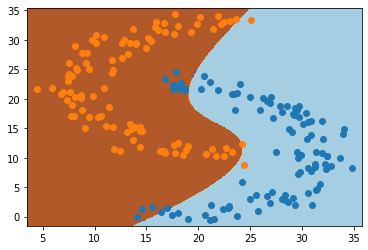

Grid Search CV (Polynomial Degree 10) plot


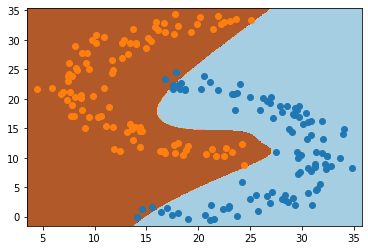

In [ ]:
# define bounds of the domain
min1, max1 = dataSet3["Column1"].min()-1, dataSet3["Column1"].max()+1
min2, max2 = dataSet3["Column2"].min()-1, dataSet3["Column2"].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

parameters10 = {'kernel':['poly'], 'degree': [10]}
svc = svm.SVC()
svcPoly = svm.SVC(kernel='poly')
GSCV10 = GridSearchCV(svc, parameters10)

svcPoly.fit(dataSet3.values, target3)
GSCV10.fit(dataSet3.values, target3)

yhatPoly = svcPoly.predict(grid)
yhatGSCV10 = GSCV10.predict(grid)

zzPoly = yhatPoly.reshape(xx.shape)
zzGSCV10 = yhatGSCV10.reshape(xx.shape)

print("Polynomial SVC plot")
plt.contourf(xx, yy, zzPoly, cmap='Paired')
for class_value in range(2):
  # get row indexes for samples with this class
  row_ix = np.where(target3 == class_value)
  # create scatter of these samples
  plt.scatter(dataSet3.values[row_ix, 0], dataSet3.values[row_ix, 1], cmap='Paired')
plt.show()

# plot the grid of x, y and z values as a surface
print("Grid Search CV (Polynomial Degree 10) plot")
plt.contourf(xx, yy, zzGSCV10, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
  # get row indexes for samples with this class
  row_ix = np.where(target3 == class_value)
  # create scatter of these samples
  plt.scatter(dataSet3.values[row_ix, 0], dataSet3.values[row_ix, 1], cmap='Paired')
plt.show()

##Results
The plot with Polynomial degree 10 performs better than the plot from experiment 7. The boundary is more flexible and there are less observations in the wrong class.


---